### Exploratory Data Analysis
---

#### Load dependencies and the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# setting for interpretable numbers on the read display
pd.options.display.float_format = '{:20.2f}'.format

# show all columns on output
pd.set_option('display.max_columns', 999)

In [4]:
df = pd.read_csv('online_transactions_cleaned.csv')

In [5]:
df.head(1).T

,0
InvoiceNo,536365
StockCode,85123A
Description,WHITE HANGING HEART T-LIGHT HOLDER
Quantity,6
InvoiceDate,2010-12-01 08:26:00
UnitPrice,2.55
CustomerID,17850.00
Country,United Kingdom
InvoiceDateYear,2010
InvoiceDateMonth,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396340 entries, 0 to 396339
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         396340 non-null  int64  
 1   StockCode         396340 non-null  object 
 2   Description       396340 non-null  object 
 3   Quantity          396340 non-null  int64  
 4   InvoiceDate       396340 non-null  object 
 5   UnitPrice         396340 non-null  float64
 6   CustomerID        396340 non-null  float64
 7   Country           396340 non-null  object 
 8   InvoiceDateYear   396340 non-null  int64  
 9   InvoiceDateMonth  396340 non-null  int64  
 10  InvoiceDateDay    396340 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 33.3+ MB


In [7]:
# custom info from dataset
def columns_status(dtf , cols=[] ):
    if len(cols)==0:
        cols=dtf.columns
    status=pd.DataFrame(columns=['feature' ,'dtype', 'Nones','nunique' ,'min', 'max' , 'UniqueValues' ])
    for i , col in enumerate(cols): 
        nones=dtf[col].isnull().sum()
        if (dtf[col].dtype!='object'):
            status.loc[i , :]=[col ,dtf[col].dtype , nones,dtf[col].nunique()  ,dtf[col].min() ,dtf[col].max() ,dtf[col].unique()  ]
        else:
            status.loc[i , :]=[col ,dtf[col].dtype ,nones,dtf[col].nunique()  ,'','', dtf[col].unique()]
    return(status)
     
        
columns_status(df) 

,feature,dtype,Nones,nunique,min,max,UniqueValues
0,InvoiceNo,int64,0,18402,536365,581587,"[536365, 536366, 536367, 536368, 536369, 53637..."
1,StockCode,object,0,3660,,,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
2,Description,object,0,3872,,,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
3,Quantity,int64,0,299,1,80995,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
4,InvoiceDate,object,0,17166,,,"[2010-12-01 08:26:00, 2010-12-01 08:28:00, 201..."
5,UnitPrice,float64,0,356,0.00,649.50,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
6,CustomerID,float64,0,4334,12346.00,18287.00,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
7,Country,object,0,37,,,"[United Kingdom, France, Australia, Netherland..."
8,InvoiceDateYear,int64,0,2,2010,2011,"[2010, 2011]"
9,InvoiceDateMonth,int64,0,12,1,12,"[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"


---
##### Insight:
##### The dataset most likely contains records from the first day of 2010 to the final day of 2011
---

#### Most sold and most expensive stocks

C:\Users\3sthe\AppData\Local\Temp\ipykernel_27576\3633612855.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels (most_sold_stocks.head(k).description, rotation=90)
C:\Users\3sthe\AppData\Local\Temp\ipykernel_27576\3633612855.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels (most_sold_stocks.head(k).description, rotation=90)


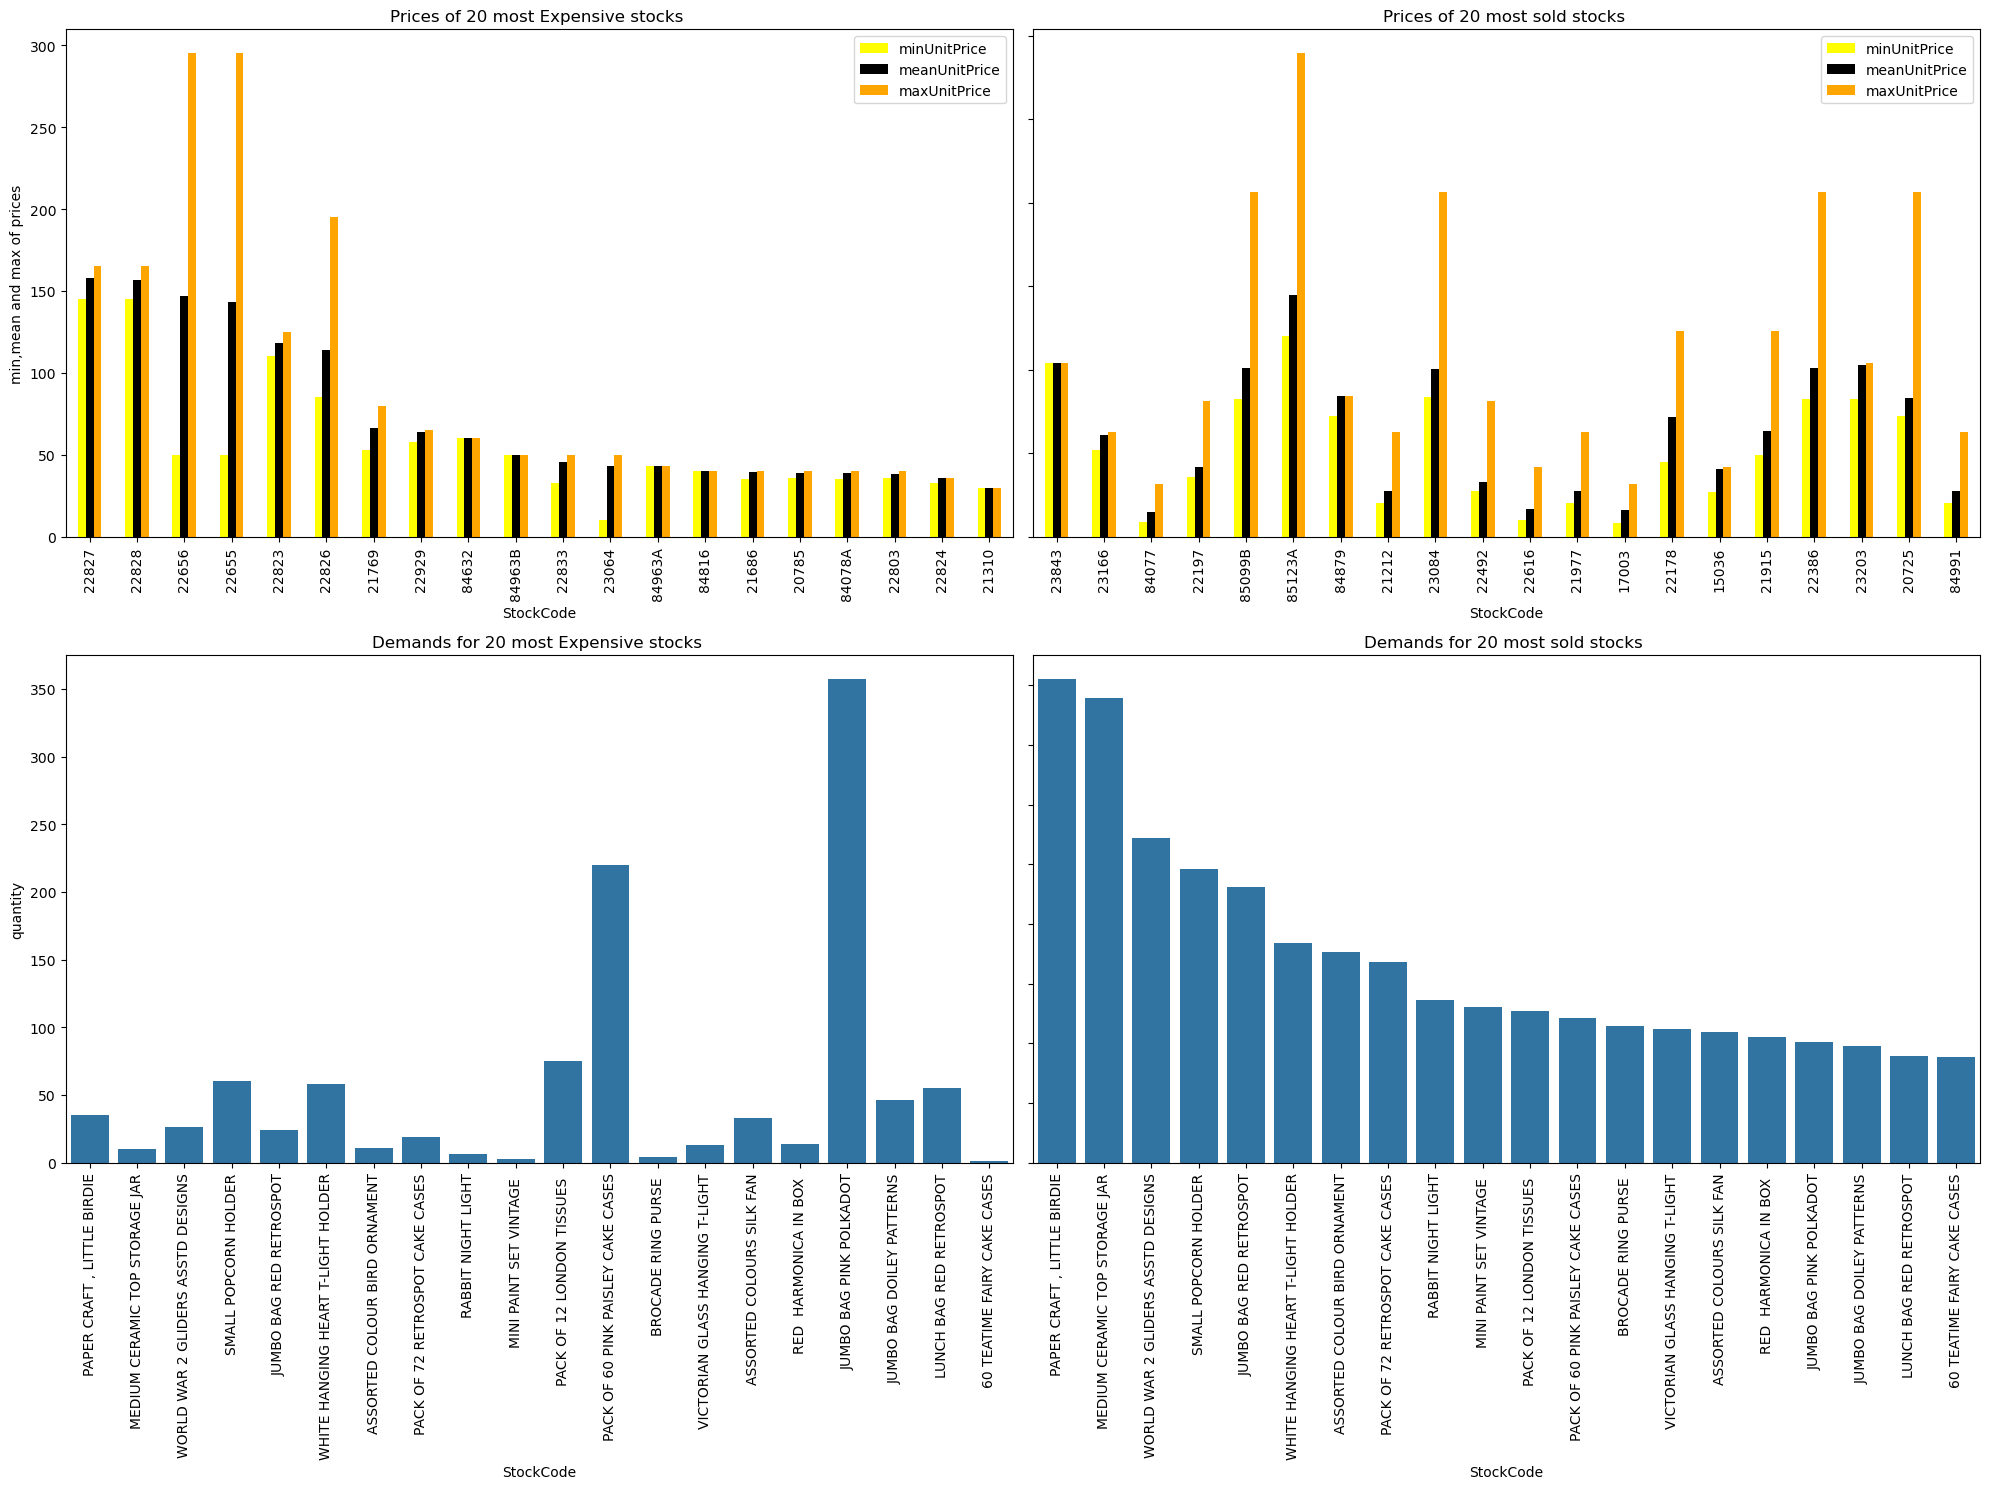

In [10]:
stocks1= df.groupby(["StockCode"])\
                .agg({'Description' : 'first', 'Quantity': 'sum', 'Country': 'count','UnitPrice': 'min' })\
                .rename(columns={'Description' : 'description',
                                 'Quantity': 'quantity' ,
                                 'Country': 'customerCountriesCount',
                                 'UnitPrice': 'minUnitPrice',
                                   })
stocks2= df.groupby(["StockCode"])\
                .agg({'UnitPrice': 'max'})\
                .rename(columns={'UnitPrice': 'maxUnitPrice' })
stocks3= df.groupby(["StockCode"])\
                .agg({'UnitPrice': 'mean'})\
                .rename(columns={'UnitPrice': 'meanUnitPrice' })
stocks= stocks1.merge(stocks2 , on = 'StockCode').merge(stocks3 , on = 'StockCode')
most_expensive_stocks = stocks.sort_values('meanUnitPrice' , ascending=False) 
most_sold_stocks =  stocks.sort_values('quantity' , ascending=False) 

##############################################################################################################################
#PLOTS
##############################################################################################################################
k=20
fig , axes = plt.subplots(2,2 , figsize=(20,15))
df1=most_expensive_stocks[['minUnitPrice','meanUnitPrice','maxUnitPrice']].head(k)
df1.plot(kind='bar',  color=['yellow', 'black', 'orange'] ,ax=axes[0,0], rot=90 , ylabel ="min,mean and max of prices" , sharey=True) 
axes[0,0].set_title('Prices of {} most Expensive stocks '.format(k))

df2=most_sold_stocks[['minUnitPrice','meanUnitPrice','maxUnitPrice']].head(k)
df2.plot(kind='bar',  color=['yellow','black', 'orange'] ,ax=axes[0,1], rot=90 , ylabel ="min,mean and max of prices") 
axes[0,1].set_title('Prices of {} most sold stocks '.format(k))

sns.barplot(x=most_expensive_stocks.head(k).index , y=most_expensive_stocks.head(k)['quantity'] , ax= axes[1,0]   )
axes[1,0].set_xticklabels (most_sold_stocks.head(k).description, rotation=90) 
axes[1,0].set_title('Demands for {} most Expensive stocks '.format(k))


sns.barplot(x=most_sold_stocks.head(k).index , y=most_sold_stocks.head(k)['quantity'] , ax= axes[1,1] )
axes[1,1].set_xticklabels (most_sold_stocks.head(k).description, rotation=90) 
axes[1,1].set_title('Demands for {} most sold stocks '.format(k))
 
plt.tight_layout()
# plt.savefig('stocks_visualization.png', dpi=300, bbox_inches='tight')
plt.show() 

### Top Products - Quantity

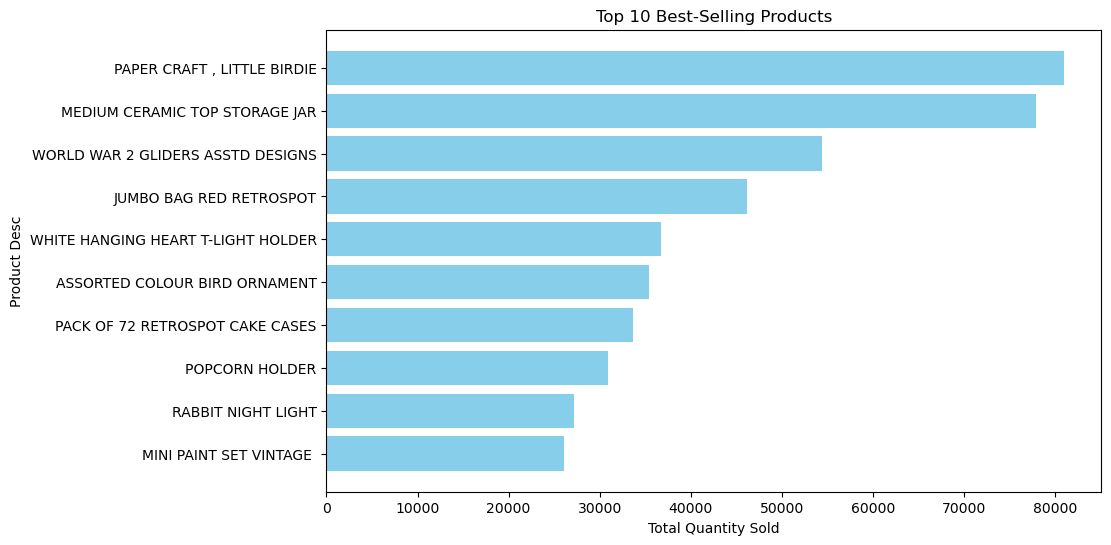

In [12]:
# Group the data by 'StockCode' and calculate the total quantity sold for each product
top_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order and select the top N products (e.g., top 10)
top_n = 10  # Change this value to select a different number of top products
top_products = top_products.sort_values('Quantity', ascending=False).head(top_n)

# Create a horizontal bar plot to visualize the top-selling products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'], color='skyblue')
plt.title(f'Top {top_n} Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Desc')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest quantity at the top
# plt.savefig('top_selling_products.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Transforming time-based data for further analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime


# extract the year from the datetime object x
df['year']=df['InvoiceDate'].apply(lambda x : x.year)
# call month_name() on each datetime object x, returning the full name of the month (e.g., "January", "February")
df['month']=df['InvoiceDate'].apply(lambda x : x.month_name())
# call day_name() on each datetime object x, returning the full name of the day of the week (e.g., "Monday", "Tuesday")
df['day']=df['InvoiceDate'].apply(lambda x : x.day_name())
# extract the hour (0-23) from each datetime object x
df['hour']=df['InvoiceDate'].apply(lambda x : x.hour)
# categorizing time of day
df['TimeSegment'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

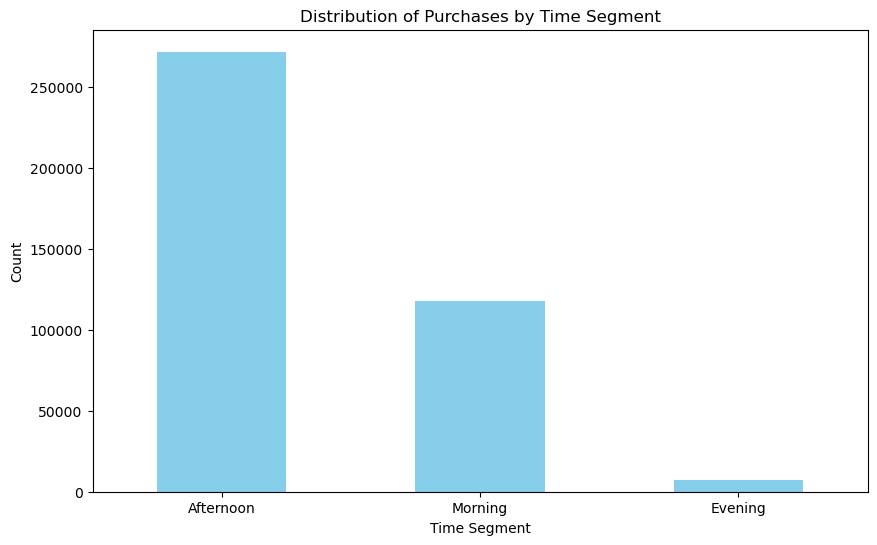

In [14]:
# Count the number of occurrences of each time segment
time_segment_counts = df['TimeSegment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
time_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Purchases by Time Segment')
plt.xlabel('Time Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
# plt.savefig('purchases_by_time_of_day.png', dpi=300)
plt.show()

### Temporal time related plots

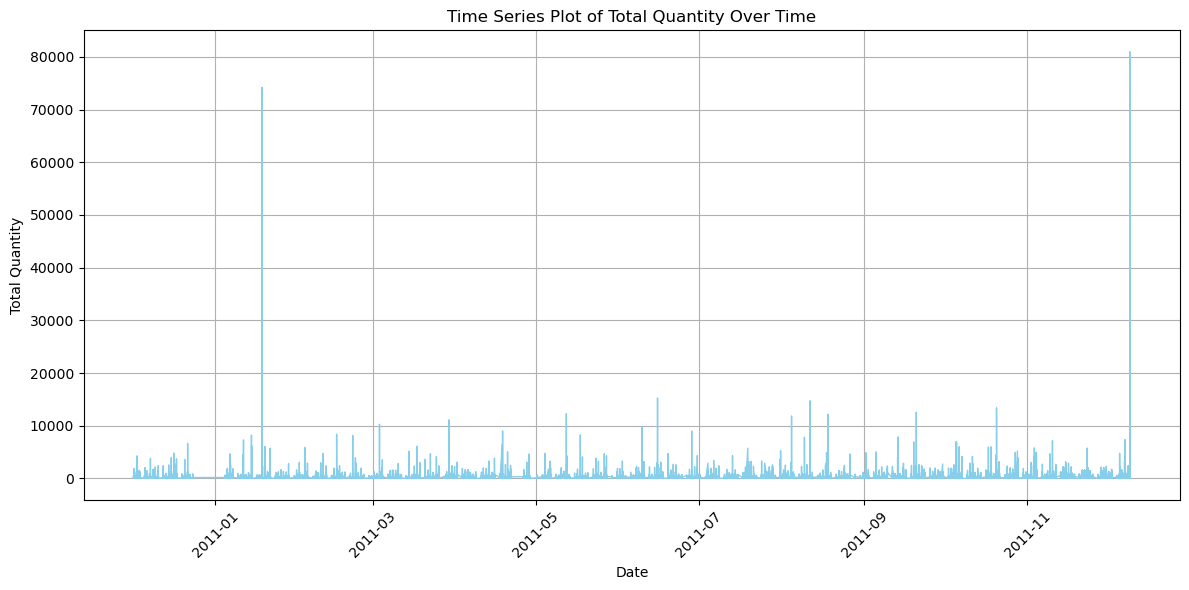

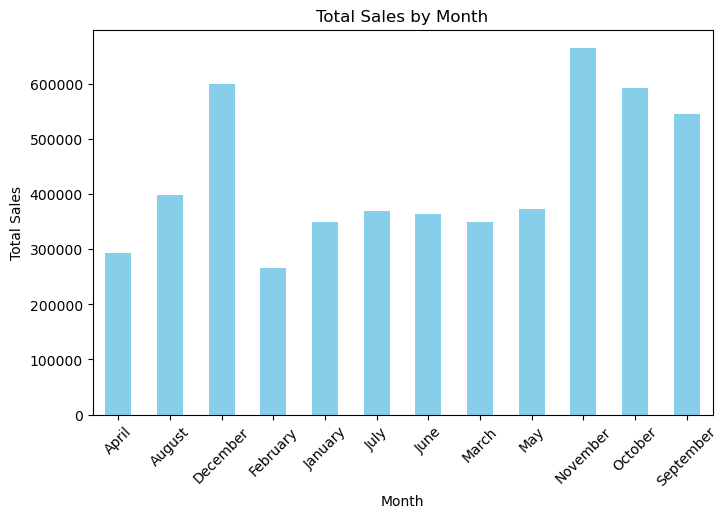

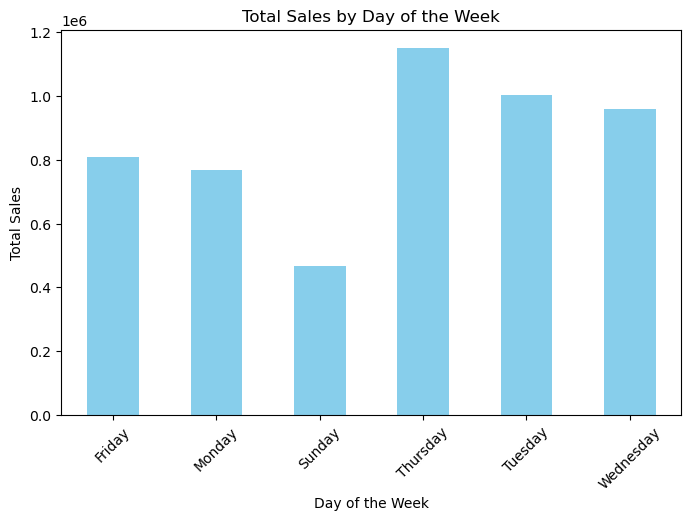

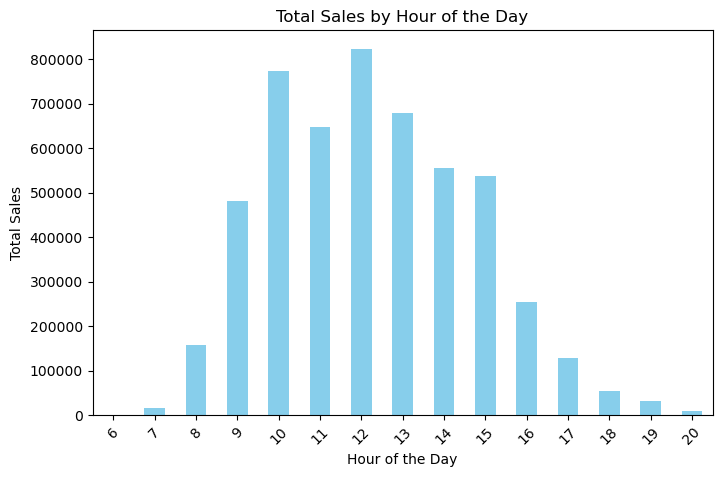

In [25]:
# Group by 'InvoiceDate' and sum 'Quantity'
daily_quantity = df.groupby('InvoiceDate')['Quantity'].sum().reset_index()

# Plotting timeSeries
plt.figure(figsize=(12, 6))
plt.plot(daily_quantity['InvoiceDate'], daily_quantity['Quantity'], color='skyblue', linewidth=1)
plt.title('Time Series Plot of Total Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
# plt.savefig('yearly_timeSeries.png', dpi=300)
plt.show()

# Sales by Month
monthly_sales = df.groupby('month')['Quantity'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# plt.savefig('monthly_total_sales.png', dpi=300)
plt.show()

# Sales by Day of the Week
day_of_week_sales = df.groupby('day')['Quantity'].sum()
plt.figure(figsize=(8, 5))
day_of_week_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# plt.savefig('weekly_total_sales.png', dpi=300)
plt.show()

# Peak Sales Hours
hourly_sales = df.groupby('hour')['Quantity'].sum()
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# plt.savefig('daily_total_sales.png', dpi=300)
plt.show()

In [73]:
df['InvoiceDateYear'].value_counts()

InvoiceDateYear
2011    370284
2010     26056
Name: count, dtype: int64

---
##### Insight:
##### 2010 records are very low in total count compared to 2011 records
##### For simplicity, drop the 2010 records.
---

In [76]:
# Overwriting the original dataframe to exclude 2010 records
df = df[df['InvoiceDate'].dt.year != 2010]

In [82]:
# columns_status(df)

#### Correlation Analysis

##### Exploring correlational relationships - the strength 
##### of the variables with respect to one another

In [92]:
numeric_columns = df.select_dtypes(exclude=['object'])

Text(0.5, 1.0, 'Correlation Heatmap')

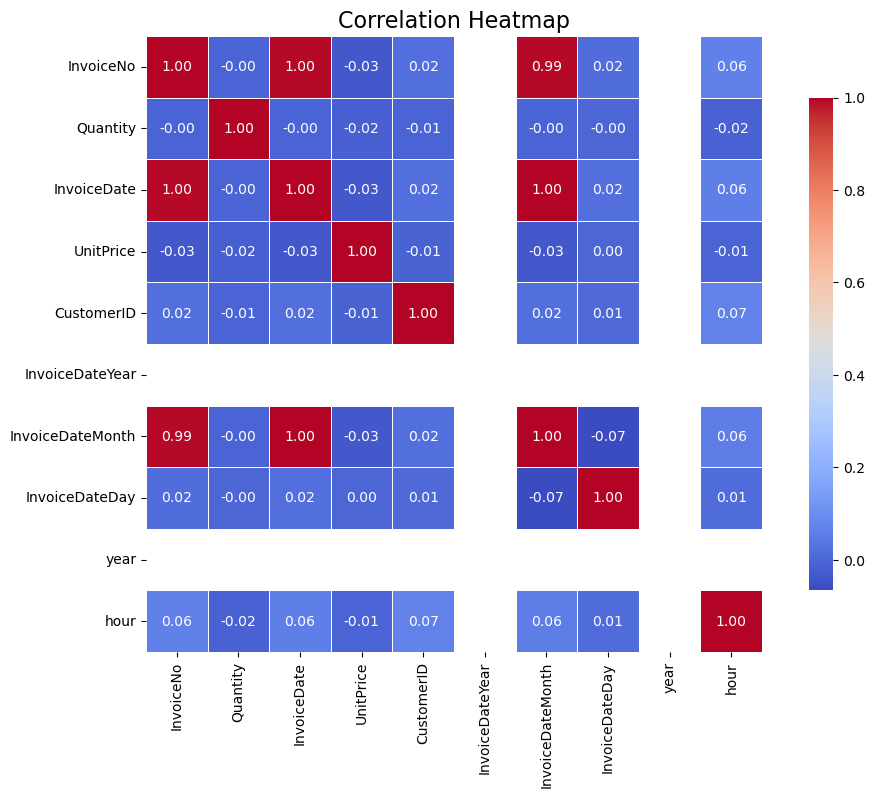

In [98]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heatmap', fontsize=16)

# save the heatmap
# plt.savefig('correlation_heatmap.png', dpi=300)

##### Insight:
##### Weak correlations which mean no significant bias in dataset